## Classification using KNN PIMA DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r'E:/pima.xlsx', sheet_name='pima')
data.head()

,freq_pregnant,con_glukose,diastolic,thickness_skin,insulin,BMI,Diabetes_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn= KNeighborsClassifier (n_neighbors=5)

In [5]:
from sklearn.model_selection import KFold, cross_val_score
y = data['Class']
X = data.drop(['Class'], axis=1)
k_fold = KFold(n_splits=10)
akurasi = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')
presisi = cross_val_score(knn,X, y,cv=k_fold, scoring='precision')
recall = cross_val_score(knn,X,y, cv=k_fold, scoring='recall')
AUCscore = cross_val_score(knn, X, y, cv=k_fold, scoring ='roc_auc')

In [6]:
print(akurasi)
print(presisi)
print(recall)
print(AUCscore)

[0.63636364 0.83116883 0.7012987  0.63636364 0.71428571 0.75324675
 0.74025974 0.80519481 0.68421053 0.76315789]
[0.58333333 0.73684211 0.73913043 0.54166667 0.60869565 0.78947368
 0.3125     0.69230769 0.5        0.71428571]
[0.4375     0.63636364 0.5        0.43333333 0.51851852 0.5
 0.35714286 0.72       0.54166667 0.66666667]
[0.646875   0.81694215 0.71990424 0.69113475 0.78444444 0.79184397
 0.73696145 0.88653846 0.71314103 0.73224638]


In [7]:
print(akurasi.mean())
print(presisi.mean())
print(recall.mean())
print(AUCscore.mean())

0.7265550239234451
0.6218235283023612
0.5311191678691679
0.7520031872613351


### the best k

In [8]:
k_range = range(5,10)
k_akurasi=[]
k_presisi =[]
k_recall =[]
for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    akurasi = cross_val_score(knn, X, y, cv=k_fold, scoring ='accuracy')
    k_akurasi.append(akurasi.mean())
    presisi = cross_val_score(knn,X,y, cv=k_fold, scoring='precision')
    k_presisi.append(presisi.mean())
    recall = cross_val_score(knn, X, y, cv=k_fold, scoring='recall')
    k_recall.append(recall.mean())

In [9]:
print (k_akurasi)
print(k_presisi)
print (k_recall)

[0.7265550239234451, 0.7369617224880384, 0.7448051948051948, 0.7447881066302118, 0.7396103896103897]
[0.6218235283023612, 0.6782916928272965, 0.6499185161243985, 0.691876080575771, 0.6465537336760248]
[0.5311191678691679, 0.44652240896358536, 0.5684343434343433, 0.47888135557253203, 0.5512575757575757]


Text(0,0.5,'Cross-validated value')

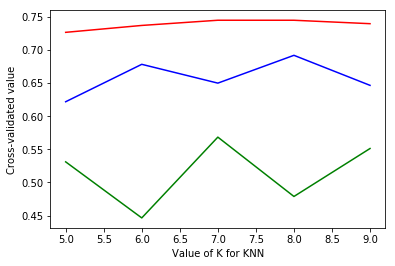

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot (k_range, k_akurasi, color='red')
plt.plot (k_range, k_presisi, color='blue')
plt.plot (k_range, k_recall, color ='green')
plt.xlabel('Value of K for KNN')
plt.ylabel ('Cross-validated value')